In [1]:
# 每行代表一个用户，各字段之间由逗号分隔，
# 顺序依次为：“userID，age，gender，education，marriageStatus，haveBaby，hometown，residence”。
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd

path = '~/codedata/tpai/pre/'
trainfile = 'train.csv'
train = pd.read_csv(path + trainfile)
user = pd.read_csv(path + 'user.csv')

In [2]:
train = pd.merge(train, user, on = 'userID', how='left')
train.head()

label  clickTime  conversionTime  creativeID   userID  positionID  \
0      0     170000             NaN        3089  2798058         293   
1      0     170000             NaN        1259   463234        6161   
2      0     170000             NaN        4465  1857485        7434   
3      0     170000             NaN        1004  2038823         977   
4      0     170000             NaN        1887  2015141        3688   

   connectionType  telecomsOperator  age  gender  education  marriageStatus  \
0               1                 1   25       2          1               3   
1               1                 2   20       2          1               1   
2               4                 1   16       1          1               0   
3               1                 1    0       0          0               0   
4               1                 1   35       1          2               2   

   haveBaby  hometown  residence  
0         1         0       1301  
1         0         0        213  
2         0         0       1502  
3         0         0       1001  
4         0      1001       1001

In [3]:
test = {}
def property(var, train):
    sns.distplot(train[var], kde=False)
    fig = plt.figure()
    means = train.groupby(var)['label'].mean()
    plt.scatter(x=means.index, y = means.values)
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    return (var, len(train[var].value_counts()), sort_means.max() - sort_means.min(), sort_means.std())

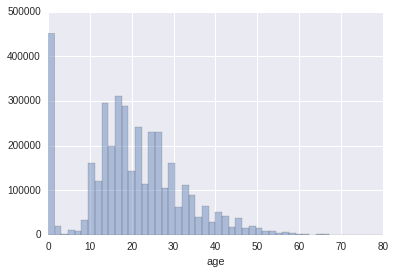

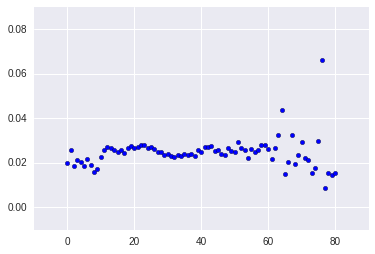

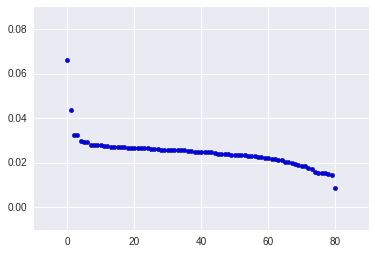

In [4]:
# 比较乱，因该没有关系
# age
var = 'age'
test[var] = property(var, train)

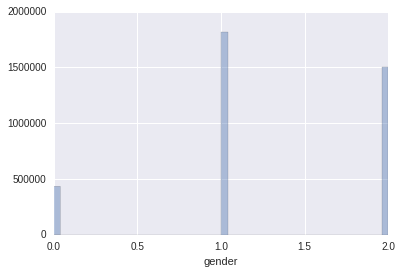

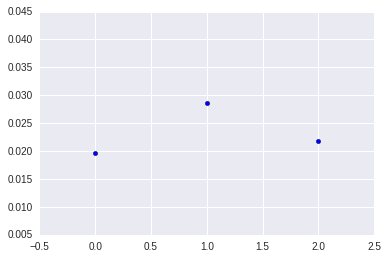

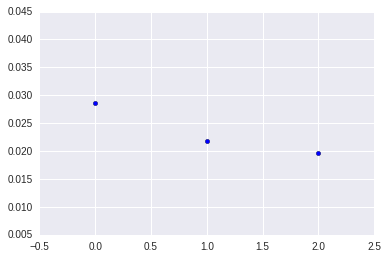

In [5]:
var = 'gender'
test[var] = property(var, train)

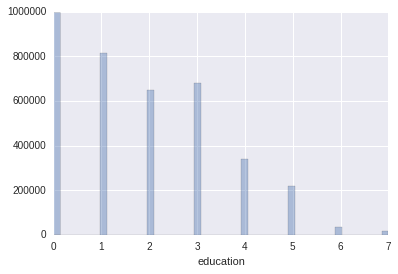

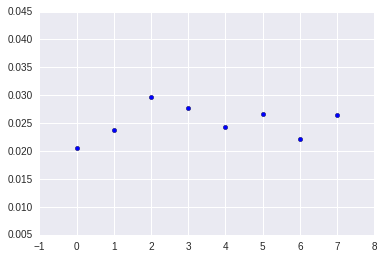

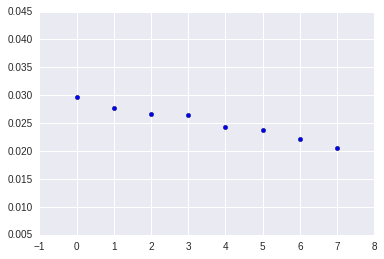

In [6]:
var = 'education'
test[var] = property(var, train)

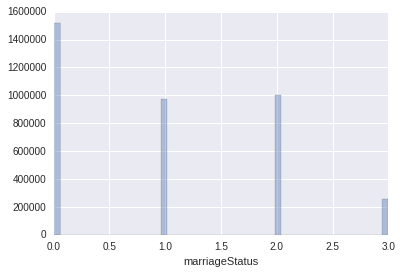

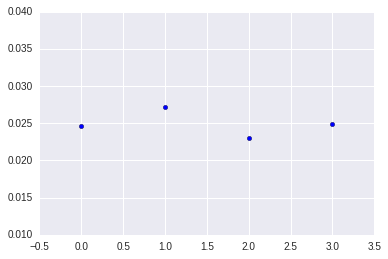

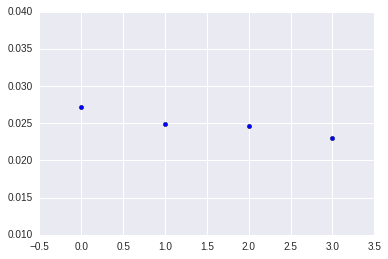

In [7]:
# 用户当前感情状况，取值包括单身，新婚，已婚，未知。
var = 'marriageStatus'
test[var] = property(var, train)

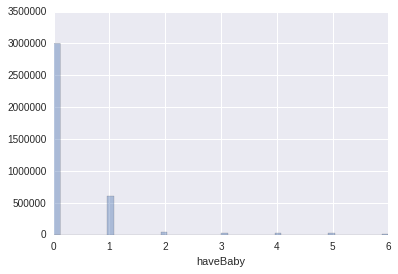

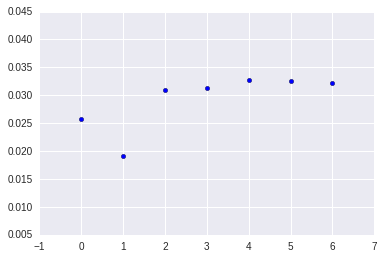

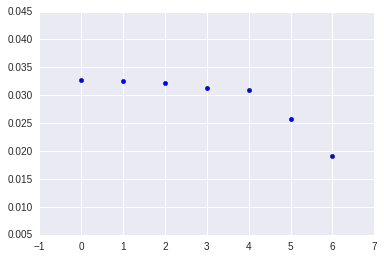

In [8]:
# 用户当前孕育宝宝状态，取值包括孕育中，宝宝0~6个月，宝宝6~12个月，宝宝1~2岁，宝宝2~3岁，育儿但宝宝年龄未知，未知。
var = 'haveBaby'
test[var] = property(var, train)

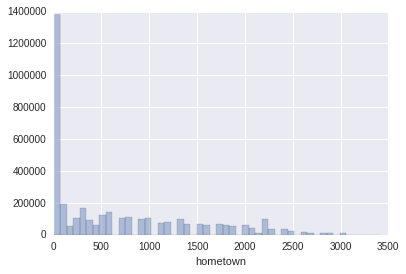

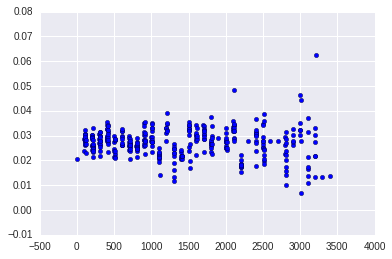

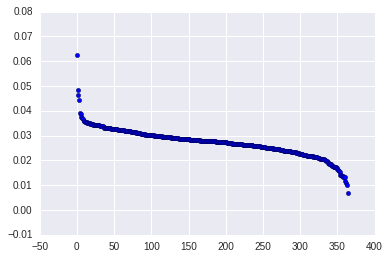

In [9]:
# 用户出生地，取值具体到市级城市，使用二级编码，千位百位数表示省份，十位个位数表示省内城市，
# 如1806表示省份编号为18，城市编号是省内的6号，编号0表示未知。
var = 'hometown'
test[var] = property(var, train)

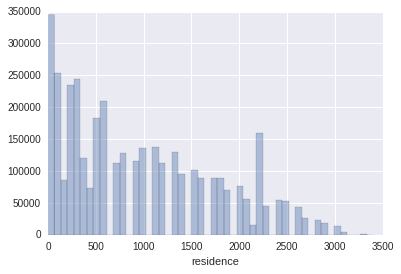

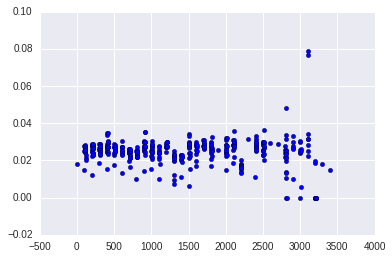

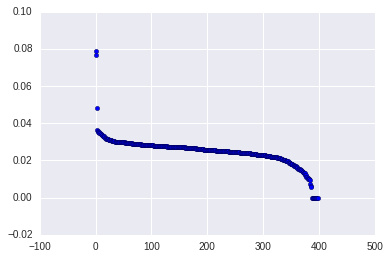

In [10]:
# 最近一段时间用户长期居住的地方，取值具体到市级城市，编码方式与家乡相同。
# 散点图中竖着的一列点应该表示一个省份中不同市级城市的概率，应该还是比较乱的
var = 'residence'
test[var] = property(var, train)

In [17]:
for (k,v) in test.items():
    print v

('gender', 3, 0.0089172307306685863, 0.0046607920728349225)
('age', 81, 0.057495012824166428, 0.006662250035074235)
('residence', 399, 0.078651685393258425, 0.0075065408905755091)
('haveBaby', 7, 0.013772943834932227, 0.0050835138043705281)
('marriageStatus', 4, 0.0041022545913669932, 0.0016869540469555092)
('hometown', 365, 0.055743243243243243, 0.0057415423374340075)
('education', 8, 0.0091586806707391159, 0.0030160253068509456)


label       age    gender  education  marriageStatus  \
label           1.000000  0.006484 -0.006067   0.012722       -0.002709   
age             0.006484  1.000000  0.350603  -0.043052        0.338860   
gender         -0.006067  0.350603  1.000000   0.115340        0.051904   
education       0.012722 -0.043052  0.115340   1.000000       -0.054907   
marriageStatus -0.002709  0.338860  0.051904  -0.054907        1.000000   
haveBaby       -0.000471  0.118483  0.181682   0.023421        0.009674   
hometown        0.011038  0.167783  0.147318   0.093338        0.041608   
residence       0.001840  0.048239  0.059086   0.034649        0.005624   

                haveBaby  hometown  residence  
label          -0.000471  0.011038   0.001840  
age             0.118483  0.167783   0.048239  
gender          0.181682  0.147318   0.059086  
education       0.023421  0.093338   0.034649  
marriageStatus  0.009674  0.041608   0.005624  
haveBaby        1.000000  0.045746  -0.005430  
hometown        0.045746  1.000000   0.462833  
residence      -0.005430  0.462833   1.000000

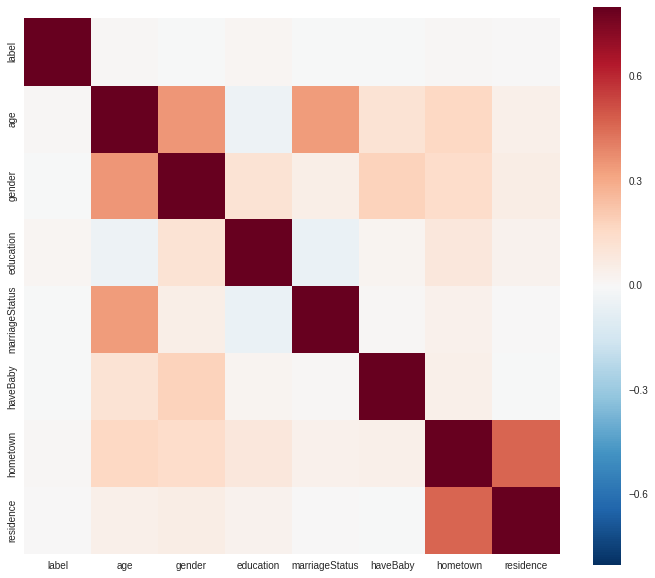

In [12]:
feats = ['label','age','gender','education','marriageStatus','haveBaby','hometown','residence']
corr = train[feats].corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.8, square=True)
corr